In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [14]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [15]:
data = pd.DataFrame(housing.data,columns=housing.feature_names)
data = pd.concat([data,pd.Series(housing.target,name='MEDV')],axis=1)
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude          MEDV  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

# Visualizing Geographical Data

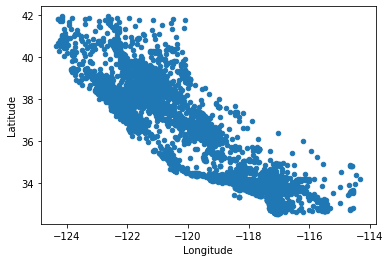

In [18]:
data.plot(kind="scatter", x="Longitude", y="Latitude")

It looks like california all right. But it is hard to see any pattern. Setting alpha to be 0.1 makes it easier to visualize the places where there exists a high density of data. 

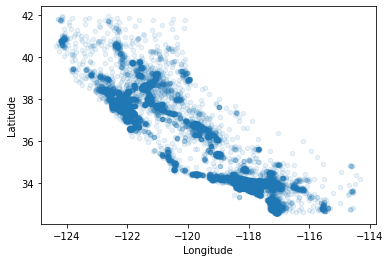

In [19]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

Now it is much better: the high-density areas are namely bay area and around LA and SD, plus a fairly high density in central valley. Our brains are very good at spotting patterns in pictures, but you may need to play around with visualization parameters to make the patterns stand out.    
Now the radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices).

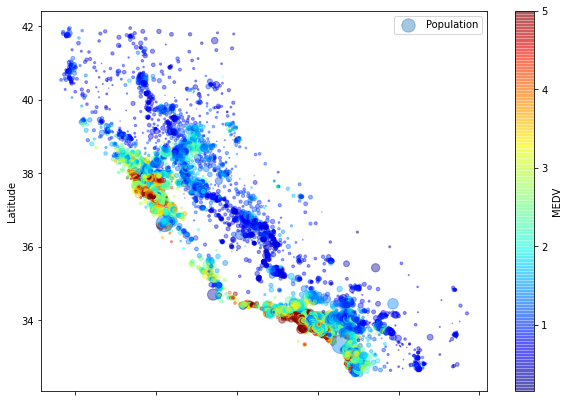

In [20]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=data["Population"]/100, label="Population", figsize=(10,7),
    c="MEDV", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already. 

# Looking for correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f262d0a3090>,
      dtype=object)

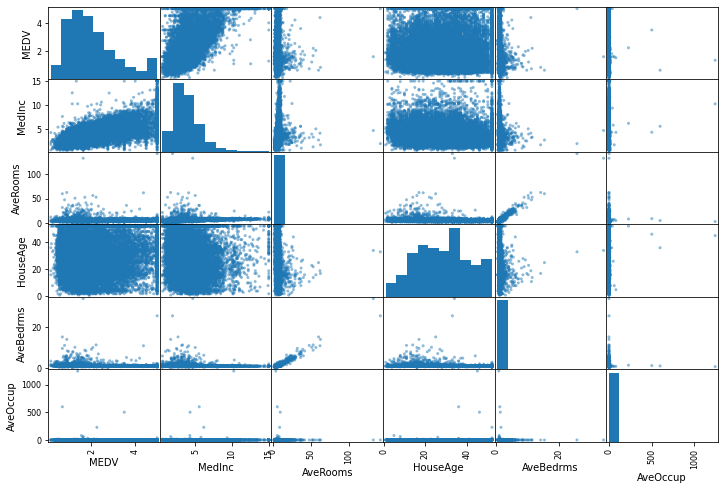

In [21]:
attributes = ["MEDV", "MedInc", "AveRooms", "HouseAge", "AveBedrms", "AveOccup"]
scatter_matrix(data[attributes], figsize=(12, 8))

# Prepare data

In [22]:
X_train, X_val, y_train, y_val = train_test_split(housing.data, housing.target, test_size=0.2, random_state=1)

In [23]:
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)
X_std_val = scaler.transform(X_val)

# Fine tune an ANN model

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them.       

One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Instead, you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. For example, the following code searches for the best combination of hyperparameter values for the MLPRegressor:

In [28]:
param_grid = {
    "hidden_layer_sizes": [(6, 6, 6), (16, 8), (32,)],
    "activation": ["relu", "tanh"],
    "batch_size": [32, 64], 
    "learning_rate": ["constant", "adaptive"],
}

In [29]:
ann_reg = MLPRegressor(max_iter=1000)
grid_search = GridSearchCV(ann_reg, param_grid, cv=5, 
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_std_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=1000),
             param_grid={'activation': ['relu', 'tanh'], 'batch_size': [32, 64],
                         'hidden_layer_sizes': [(6, 6, 6), (16, 8), (32,)],
                         'learning_rate': ['constant', 'adaptive']},
             return_train_score=True, scoring='neg_mean_squared_error')

The *param_grid* tells Scikit-Learn to evaluate all 3 × 2 × 2 × 2 = 24 combinations of the hyperparameter values specified in the *dict*.

The grid search will explore 24 combinations of *MLPRegressor* hyperparameter values, and it will train each model 5 times (since we are using five-fold cross validation). In other words, all in all, there will be 24 × 5 = 120 rounds of training! It may take quite a long time, but when it is done you can get the best combination of parameters like this:

In [30]:
print(grid_search.best_params_)

{'activation': 'tanh', 'batch_size': 64, 'hidden_layer_sizes': (16, 8), 'learning_rate': 'adaptive'}


You can also get the best estimator directly:

In [31]:
print(grid_search.best_estimator_)

MLPRegressor(activation='tanh', batch_size=64, hidden_layer_sizes=(16, 8),
             learning_rate='adaptive', max_iter=1000)


And of course the evaluation scores are also available:

In [32]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.5661371335920766 {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant'}
0.5619074875980398 {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive'}
0.5386687498612247 {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (16, 8), 'learning_rate': 'constant'}
0.5401685621159473 {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (16, 8), 'learning_rate': 'adaptive'}
0.5533519124551416 {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant'}
0.5490738616043502 {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (32,), 'learning_rate': 'adaptive'}
0.5554505568901327 {'activation': 'relu', 'batch_size': 64, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant'}
0.5538604103939857 {'activation': 'relu', 'batch_size': 64, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive'}
0.5393989841465412 {'activation': 'r